In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


In [2]:
# Handle the data from the CSV
import csv

csv_data = []
with open('data/combined_tweets.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            csv_data.append(row)
            line_count += 1


Column names are tweet_id, user, text, date, retweets, replies, likes, quotes, has_viz


In [3]:
# Get all of the tweets for all users and split between noviz and viz
viz = []
noviz = []

for tweet in csv_data :
    if tweet[-1] == "True":
        viz.append(int(tweet[6]))
    else:
        noviz.append(int(tweet[6]))

In [4]:
data = [noviz, viz]

In [22]:
fig = plt.figure(figsize =(10, 7))

<Figure size 2160x2160 with 0 Axes>

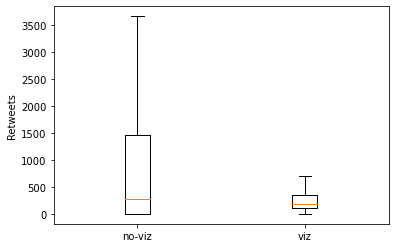

In [6]:
# Creating plot
plt.boxplot(data, notch=False, showfliers=False, labels=["no-viz", "viz"])
plt.ylabel("Retweets")
 
# show plot
plt.show()

In [7]:
a = np.histogram(viz)

In [8]:
def buildBins(min = 0, spacing = 1, numbins = 10) :
    ret = [min + float(x)*spacing for x in range(numbins)]
    return ret

def binCenters(bins):
    mids = []
    for i in range(len(bins)-1) :
        lower = bins[i]
        upper = bins[i+1]
        mid = (lower + upper) / 2
        mids.append(mid)
    return mids

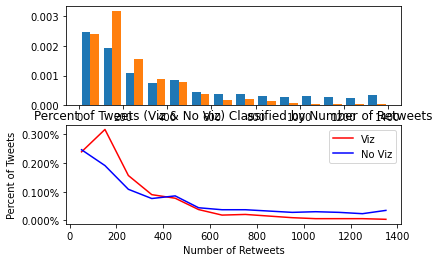

In [23]:
# Build the bins by user pref
bins = buildBins(min = 1, spacing = 100, numbins = 15)

# The top subplot is classic histo
plt.subplot(211)
n, x, _ = plt.hist(data, bins = bins, density = True)

#plt.close()

# The bottom sublplot is a line 
plt.subplot(212)
bin_centers = binCenters(bins)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.plot(bin_centers, n[1], '-', c='red', label="Viz")
plt.plot(bin_centers, n[0], '-', c='blue', label="No Viz")
plt.title("Percent of Tweets (Viz & No Viz) Classified by Number of Retweets")
plt.xlabel("Number of Retweets")
plt.ylabel("Percent of Tweets")
plt.legend(loc="upper right")
# Show the plots
plt.show()

In [10]:
print(n)

[[2.46543779e-03 1.91244240e-03 1.08294931e-03 7.60368664e-04
  8.52534562e-04 4.37788018e-04 3.68663594e-04 3.68663594e-04
  3.22580645e-04 2.76497696e-04 2.99539171e-04 2.76497696e-04
  2.30414747e-04 3.45622120e-04]
 [2.39229025e-03 3.17460317e-03 1.56462585e-03 8.95691610e-04
  7.70975057e-04 3.74149660e-04 1.81405896e-04 2.04081633e-04
  1.47392290e-04 9.07029478e-05 5.66893424e-05 5.66893424e-05
  5.66893424e-05 3.40136054e-05]]
